# Importing Libs

# Loading Dataset

In [1]:
# Import required libraries
import joblib
import xgboost as xgb
import pickle

models_path = '../models'
model_dir_path = models_path + '/1m-label_15-dw_alpha_2/sub-train-BTC_1648771200'
model_path = model_dir_path + '/cb_btc_1648771200_model.joblib'
train_X_path = model_dir_path + '/cb_btc_1648771200_trained_df.pkl'
train_Y_path = model_dir_path + '/cb_btc_1648771200_trained_labels_df.pkl'

model = joblib.load(model_path)
with open(train_X_path, 'rb') as f:
    train_X = pickle.load(f)

with open(train_Y_path, 'rb') as f:
    train_Y = pickle.load(f)

In [ ]:
import seaborn as sea
import matplotlib.pyplot as plt
from denseweight import DenseWeight

for i in range(5):
    dw = DenseWeight(alpha=i/5)
    dw.fit(train_Y.values)
    plt.plot(dw.weights)
    plt.show()



In [ ]:
train_Y.shape

In [ ]:
sea.histplot(weights)

In [ ]:
weights.sum()

In [ ]:
plt.plot(dw.y_dens_grid)


In [ ]:
sea.histplot(train_Y)
plt.show()
sea.histplot(weights)
plt.show()

In [ ]:
import numpy as np
train_Y_sorted_indexes = np.argsort(train_Y.values, axis=0)[:,0]
train_Y_sorted = train_Y.values[train_Y_sorted_indexes]
weights_sorted = weights[train_Y_sorted_indexes]

In [ ]:
# plt.plot(train_Y_sorted)
# plt.plot(weights_sorted)
values = train_Y_sorted * weights_sorted
filtered_index = np.where(np.logical_or(values > 0.01,values < -0.01))[0]

print(filtered_index)
plt.plot(train_Y_sorted[filtered_index])

In [ ]:
train_Y_sorted_indexes

In [ ]:
train_Y.values

In [ ]:
train_Y_sorted_indexes

In [ ]:
plt.plot(train_Y_sorted)

In [ ]:
train_Y_sorted_indexes = train_Y.sort

In [ ]:
plt.plot(train_X['%-raw_price_gen_BTC/USDTUSDT_15m'])

In [ ]:
# print long list of columns


In [ ]:
import feather

# Load the feather file
df = feather.read_dataframe('../models/label-period-4/backtesting_predictions/cb_btc_1648771200_prediction.feather')


In [ ]:
import pandas as pd

# read the csv file
df = data

# filter columns starting with 'start_str'

In [ ]:
data

In [ ]:
import xgboost as xgb
from bayes_opt import BayesianOptimization

# define the function to be optimized
def xgb_cv(max_depth, learning_rate, n_estimators, gamma, min_child_weight, max_delta_step, subsample, colsample_bytree):
    params = {
        'max_depth': int(max_depth),
        'learning_rate': learning_rate,
        'n_estimators': int(n_estimators),
        'gamma': gamma,
        'min_child_weight': min_child_weight,
        'max_delta_step': max_delta_step,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'objective': 'binary:logistic',
        'seed': 42
    }
    cv_result = xgb.cv(params, dtrain, num_boost_round=3000, nfold=5, metrics=['auc'], early_stopping_rounds=10)
    return cv_result['test-auc-mean'].max()

# define search space bounds
bounds = {
    'max_depth': (3, 7),
    'learning_rate': (0.01, 0.3),
    'n_estimators': (50, 300),
    'gamma': (0, 1),
    'min_child_weight': (1, 10),
    'max_delta_step': (0, 5),
    'subsample': (0.5, 1),
    'colsample_bytree': (0.1, 1)
}

# create train and validation sets
dtrain = xgb.DMatrix(X_train, label=y_train)

# create BayesianOptimization object and run optimization
xgb_bo = BayesianOptimization(f=xgb_cv, pbounds=bounds, random_state=42)
xgb_bo.maximize(init_points=10, n_iter=20)

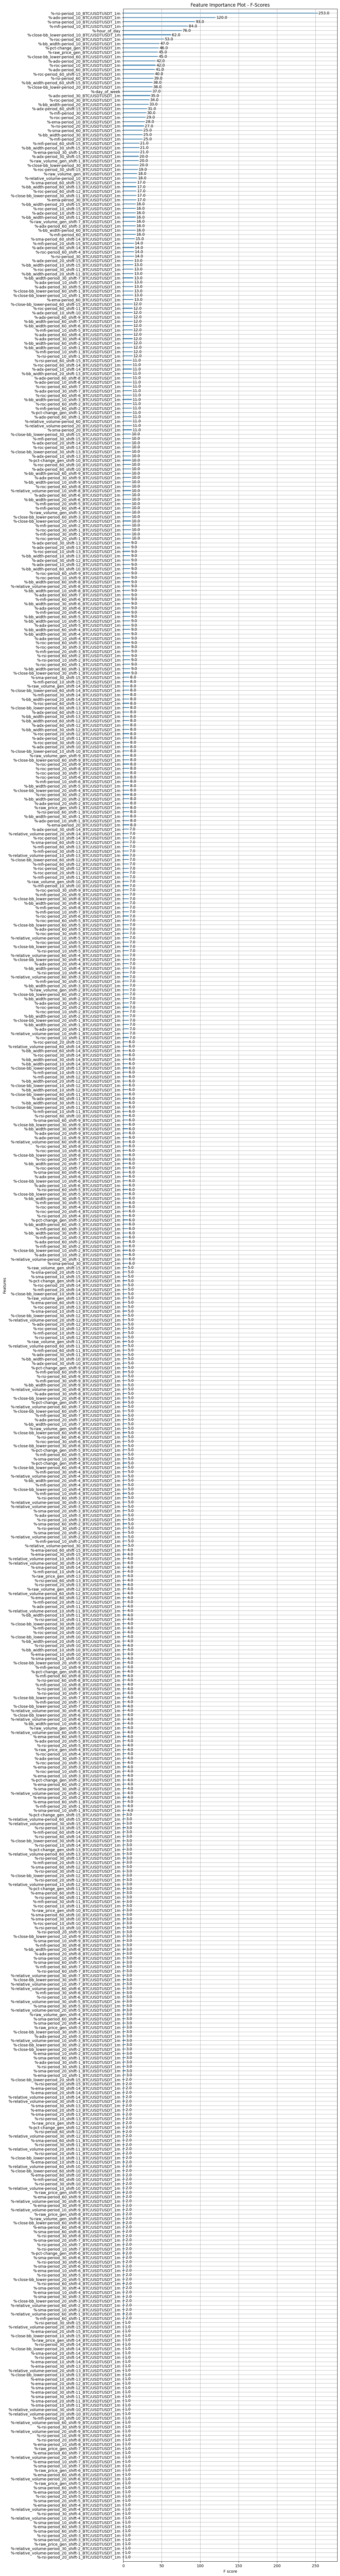

In [4]:
import xgboost as xgb
import matplotlib.pyplot as plt

# plot feature importance
xgb.plot_importance(model, importance_type='weight')
plt.title("Feature Importance Plot - F-Scores")
fig = plt.gcf()
fig.set_size_inches(10, 120) # set size here
plt.show()
